In [80]:
#Imports necesarios para que todod funcione
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#Recolectamos los datos con los que trabajaremos
df = pd.read_csv('https://raw.githubusercontent.com/RyoTheCat/Public_Domunets/main/CtoF.csv')
df.columns = ['C','F']
print(df)

       C       F
0    353   667.4
1    527   980.6
2    512   953.6
3    959  1758.2
4    812  1493.6
..   ...     ...
994  104   219.2
995  277   530.6
996  360   680.0
997  966  1770.8
998  569  1056.2

[999 rows x 2 columns]


In [82]:
#Separamos en nuestra variable con las entradas y la variable con las salidas
df_X = df['C']
df_Y = df['F']

In [83]:
#Preparamos el modelo de red neuronal
#Usaremos un modelo muy simple con solo una neurona de entrada y una neurona de salida
capa = tf.keras.layers.Dense(units=1,input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [84]:
#Con esto preparamos la configuración de nuestro modelo.
#la variable delta será el valor con el cual corregirá nuestro modelo.
#Si es muy grande, tal vez no pueda corregir de manera fina, si es muy pequeño, tal vez no alcance a corregir correctamente

delta = 0.1
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(delta),
    loss='mean_squared_error'
)

In [85]:
#Comenzamos el Entrenamiento del modelo
print("Comenzamos entrenamiento...")
n_pasadas = 150
historial = modelo.fit(df_X,df_Y,epochs=n_pasadas,verbose=False)
print('Modelo Entrenado!')

Comenzamos entrenamiento...
Modelo Entrenado!


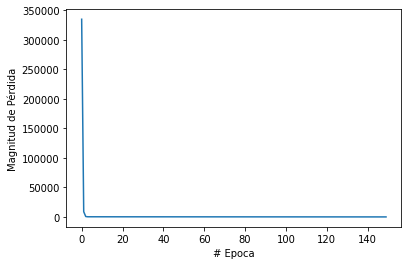

In [86]:
#Vamos a visualizar como lo hizo el modelo
#En la siguiente gráfica veremos graficado de cuant ofue el ajuste que hizo el modelo por cada pasada
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de Pérdida')
plt.plot(historial.history["loss"])

In [87]:
#probaremos nuestro modelo con números que no están incluidos en nuestra información original
#con el fin de saber que tan bueno es nuestro modelo para calcular el resultado

df_test = [2,7,9,13,14,19,20]
print(df_test)
print("Hagamos algunas predicciones:")
for item in df_test:
  print(str(item)+"° celcius son: "+ str(modelo.predict([item])) +"° fahrenheit")


[2, 7, 9, 13, 14, 19, 20]
Hagamos algunas predicciones:
1/1 [==============================] - 0s 73ms/step
2° celcius son: [[35.48517]]° fahrenheit
1/1 [==============================] - 0s 45ms/step
7° celcius son: [[44.486008]]° fahrenheit
1/1 [==============================] - 0s 44ms/step
9° celcius son: [[48.086346]]° fahrenheit
1/1 [==============================] - 0s 44ms/step
13° celcius son: [[55.287018]]° fahrenheit
1/1 [==============================] - 0s 42ms/step
14° celcius son: [[57.08719]]° fahrenheit
1/1 [==============================] - 0s 38ms/step
19° celcius son: [[66.08803]]° fahrenheit
1/1 [==============================] - 0s 43ms/step
20° celcius son: [[67.8882]]° fahrenheit


In [97]:
#Vamos a ver las Variables internas del modelo
pesos = capa.get_weights()
print(pesos)
print()
#Lo que indica una fórmula así
print("Fahrenheit = (Celcius * "+ str( pesos[0] )+ ") + " + str(pesos[1]))
#La fórmula para convertir Celcius a Fahrenheit es: °F = (°C * 1.8) + 32
#¿Está cerca?

[array([[1.8001683]], dtype=float32), array([31.88483], dtype=float32)]

Fahrenheit = (Celcius * [[1.8001683]]) + [31.88483]
